In [1]:
import sys,os
import xarray as xr
import numpy as np
import scipy as spy
import pickle 
import pandas as pd
import cftime

import matplotlib.pyplot as plt

In [2]:
sys.path.append("/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/")
import LIM_utils as lim

import LIM_utils_kb as limkb
import LIM_stats_kb as statskb
import LIM_plot_kb as plotkb
import LIM_building as limbuild

import run_forecast_model_data as rf

In [3]:
import importlib
importlib.reload(limkb)
importlib.reload(statskb)
importlib.reload(limbuild)
importlib.reload(rf)

<module 'run_forecast_model_data' from '/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/run_forecast_model_data.py'>

In [23]:
multi_dir = '/home/disk/kalman2/mkb22/LMR/data/model/multimodel_historical/'

cesm2_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-cesm2-historical/'
mpi_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-mpi-esm1-2-historical/'
gfdl_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-gfdl-esm4-historical/'
hadGEM3_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-HadGEM3-GC31-LL-historical/'
canESM_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6_CanESM5_historical/'

# train_dsource_list = ['cmip6_cesm2_hist_regridlme_Amon','cmip6_mpi_hist_regridlme_Amon',
#                       'cmip6_gfdl_hist_regridlme_Amon','cmip6_HadGEM3_hist_regridlme_Amon',
#                       'cmip6_HadGEM3_hist_regridlme_Amon']
train_dsource_list = ['cmip6_cesm2_hist_regridlme','cmip6_mpi_hist_regridlme',
                      'cmip6_gfdl_hist_regridlme','cmip6_HadGEM3_hist_regridlme',
                      'cmip6_HadGEM3_hist_regridlme']

var = 'tas'

In [5]:
# file1 = var+'_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc'
# file2 = var+'_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc'
# file3 = var+'_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc'
# file4 = var+'_sfc_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc'
# file5 = var+'_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc'

file1 = var+'_Amon_CESM2_historical_r1i1p1f1_regridLME_185001-201412.nc'
file2 = var+'_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc'
file3 = var+'_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc'
file4 = var+'_sfc_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc'
file5 = var+'_Amon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc'

savefile = var+'_Amon_CESM2_MPI_GFDL_HadGEM3_CanESM_historical_r1i1p1f3_regridlme_185001-250912.nc'

In [8]:
ds_cesm2 = xr.open_dataset(cesm2_dir+file1)
ds_mpi = xr.open_dataset(mpi_dir+file2)
ds_gfdl = xr.open_dataset(gfdl_dir+file3)
ds_hadGEM3 = xr.open_dataset(hadGEM3_dir+file4)
ds_canESM = xr.open_dataset(canESM_dir+file5)

In [9]:
ds_cesm2

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 1980)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    tas      (time, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

In [10]:
ds_mpi = ds_mpi.drop('height')
ds_mpi

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 1980)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [11]:
ds_gfdl = ds_gfdl.drop('height')
ds_gfdl = ds_gfdl.drop('bnds')
ds_gfdl

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 1980)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [12]:
ds_hadGEM3 = ds_hadGEM3.drop('height')
ds_hadGEM3

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 1980)
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [13]:
ds_canESM = ds_canESM.drop('height')
ds_canESM

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 1980)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [14]:
time_mpi = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(2015, 2015+165) for m in range(1, 13)])
time_gfdl = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(2180, 2180+165) for m in range(1, 13)])
time_hadGEM3 = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(2345, 2345+165) for m in range(1, 13)])
time_canESM = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(2510, 2510+165) for m in range(1, 13)])

In [15]:
ds_mpi = ds_mpi.assign_coords({"time": ("time", time_mpi)})
ds_gfdl = ds_gfdl.assign_coords({"time": ("time", time_gfdl)})
ds_hadGEM3 = ds_hadGEM3.assign_coords({"time": ("time", time_hadGEM3)})
ds_canESM = ds_canESM.assign_coords({"time": ("time", time_canESM)})

In [16]:
ds_multi = xr.concat([ds_cesm2,ds_mpi,ds_gfdl,ds_hadGEM3,ds_canESM], dim="time")

In [17]:
ds_multi

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 9900)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2674-12-15 00:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    tas      (time, lat, lon) float64 245.3 245.3 245.3 ... 243.4 243.4 243.4
Attributes:
    regrid_method:  bilinear

In [57]:
multi_dir+savefile

'/home/disk/kalman2/mkb22/LMR/data/model/multimodel_historical/tas_Amon_CESM2_MPI_GFDL_HadGEM3_CanESM_historical_r1i1p1f3_regridlme_185001-250912.nc'

In [58]:
ds_multi.to_netcdf(multi_dir+savefile)

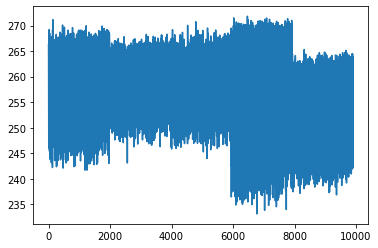

In [64]:
plt.plot(ds_multi.tas.values[:,10,10])

## Take 2: Load detrended, lat cut data: 

In [4]:
def load_sic_data(var, exp_setup):
    fdic = limkb.build_training_dic(exp_setup['valid_dsource'])

    Ptrunc = {}
    var_dict_gfdl_hist = {}
    ntims = len(exp_setup['lags'])
    print('Validation data: '+exp_setup['valid_dsource'])

    tecut = int(exp_setup['nyears_startvalid']/12)+(exp_setup['nyearsvalid'])

    X_var_gfdl_hist, var_dict_gfdl_hist = limkb.load_data(var, var_dict_gfdl_hist, fdic, 
                                                          remove_climo=exp_setup['remove_climo'], 
                                                          detrend=exp_setup['detrend'], verbose=verbose, 
                                                          tscut=None,#int(exp_setup['nyears_startvalid']/12), 
                                                          tecut=tecut, lat_cutoff=exp_setup['lat_cutoff'][var])
    
    return  X_var_gfdl_hist, var_dict_gfdl_hist, fdic, tecut

In [5]:
ntrunc= 50
#nmodes = 15 # number of coupled EOFs for LIM state space (truncated-state space)
#nmodes = 20
nmodes_sic = 50

#lat_cutoff_dict = {'tas':0.1,'psl':0.1,'zg':0.1,'tos':0.1,'sit':40,'sic':40}
lat_cutoff_dict = {'tas':40,'psl':40,'zg':40,'tos':40,'sit':40,'sic':40}

limvars = ['tas','psl','zg','tos','sit','sic']
mo='all'

lags = [0,1,2,3,4,5,6,7,8]

train_dsource = 'cesm_lme'
# train_dsource = 'era5'
# valid_dsource = 'era5'
valid_dsource = 'cesm_lme_Amon'

tau = 1

exp_setup = {}
exp_setup['limvars'] = ['tas','psl','zg','tos','sit','sic']
exp_setup['lat_cutoff'] = lat_cutoff_dict
exp_setup['Weight']=True
exp_setup['remove_climo'] = True
exp_setup['detrend'] = True
exp_setup['nyr_train'] = None

yrend = 1650
#yrstart = 1056    # validation 1905-2005, 100 years of validation
yrstart = 1081  # validation 1930-2005, 75 years of validation 
#yrstart = 95  # validation 1915-2015, 75 years of validation 

# #LME settings (in sample): 
exp_setup['nyearsvalid'] = 1000
exp_setup['nyearstrain'] = (yrend-850)
exp_setup['nyears_startvalid'] = 1*12
exp_setup['nyearstot'] = 1155

exp_setup['mo'] = mo
if 'all' in str(mo): 
    exp_setup['ind_month_trunc'] = False
else: 
    exp_setup['ind_month_trunc'] = True
exp_setup['tau'] = tau
exp_setup['train_dsource'] = train_dsource
exp_setup['valid_dsource'] = valid_dsource 
exp_setup['sic_separate'] = True
exp_setup['lags'] = lags
exp_setup['Insamp'] = False
exp_setup['step2_trunc'] = False
exp_setup['ntrunc'] = ntrunc 
exp_setup['nmodes_sic'] = nmodes_sic

verbose = True

In [85]:
yrend

1650

In [197]:
var='sit'

In [198]:
train_dsource = 'cesm_lme'
#valid_dsource = 'cmip6_cesm2_hist_regridlme'
# train_dsource = 'era5'
# valid_dsource = 'era5'
#valid_dsource = 'cmip6_cesm2_hist_regridlme'
#valid_dsource = 'cesm_lme_Amon'
valid_dsource = 'cesm_lme'

In [199]:
exp_setup['train_dsource'] = train_dsource
#exp_setup['valid_dsource'] = 'cmip6_mpi_hist_regridlme_Amon'
exp_setup['valid_dsource'] = valid_dsource

exp_setup['nyearsvalid'] = 155
exp_setup['nyearstrain'] = (yrend-850)
exp_setup['nyears_startvalid'] = 1*12
exp_setup['nyearstot'] = 1155

In [200]:
fdic_cesm_lme = limkb.build_training_dic(exp_setup['valid_dsource'])

Ptrunc = {}
var_dict_cesm_lme = {}
ntims = len(exp_setup['lags'])
print('Validation data: '+exp_setup['valid_dsource'])

tecut = int(exp_setup['nyears_startvalid']/12)+(exp_setup['nyearsvalid'])

X_var_cesm_lme, var_dict_cesm_lme = limkb.load_data(var, var_dict_cesm_lme, fdic_cesm_lme, 
                                                      remove_climo=exp_setup['remove_climo'], 
                                                      detrend=exp_setup['detrend'], verbose=verbose, 
                                                      tscut=1000,#int(exp_setup['nyears_startvalid']/12), 
                                                      tecut=None, lat_cutoff=exp_setup['lat_cutoff'][var])

Validation data: cesm_lme
Loading from sit
Loading from aIceData/LME/LIMs/sit_SImon_CESM_LME_nh_002_085001-200512.nc
time dimension: 1850 - 2005
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found with nans (not in sa

In [201]:
exp_setup['train_dsource'] = train_dsource
#exp_setup['valid_dsource'] = 'cmip6_mpi_hist_regridlme_Amon'
exp_setup['valid_dsource'] = 'cmip6_mpi_hist_regridlme'

exp_setup['nyearsvalid'] = 155
exp_setup['nyearstrain'] = (yrend-850)
exp_setup['nyears_startvalid'] = 1*12
exp_setup['nyearstot'] = 1155

In [202]:
X_var_mpi_hist, var_dict_mpi_hist, fdic_mpi_hist, tecut_mpi_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_mpi_hist_regridlme
Loading from sit
Loading from MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc
time dimension: 1850 - 2005
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found with

In [203]:
#exp_setup['valid_dsource'] = 'cmip6_gfdl_hist_regridlme_Amon'
exp_setup['valid_dsource'] = 'cmip6_cesm2_hist_regridlme'

X_var_cesm2_hist, var_dict_cesm2_hist, fdic_cesm2_hist, tecut_cesm2_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_cesm2_hist_regridlme
Loading from sit
Loading from ical/sit_SImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc
time dimension: 1850 - 2005
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found wi

In [204]:
#exp_setup['valid_dsource'] = 'cmip6_gfdl_hist_regridlme_Amon'
exp_setup['valid_dsource'] = 'cmip6_gfdl_hist_regridlme'

X_var_gfdl_hist, var_dict_gfdl_hist, fdic_gfdl_hist, tecut_gfdl_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_gfdl_hist_regridlme
Loading from sit
Loading from mon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc
time dimension: 1850 - 2005
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found wit

In [205]:
#exp_setup['valid_dsource'] = 'cmip6_HadGEM3_hist_regridlme_Amon'
exp_setup['valid_dsource'] = 'cmip6_HadGEM3_hist_regridlme'

X_var_hadGEM_hist, var_dict_hadGEM_hist, fdic_hadGEM_hist, tecut_hadGEM_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_HadGEM3_hist_regridlme
Loading from sit
Loading from dGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc
time dimension: 1850 - 2005
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found 

In [206]:
#exp_setup['valid_dsource'] = 'cmip6_CanESM_hist_regridlme_Amon'
exp_setup['valid_dsource'] = 'cmip6_CanESM_hist_regridlme'

X_var_CanESM_hist, var_dict_CanESM_hist, fdic_CanESM_hist, tecut_CanESM_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_CanESM_hist_regridlme
Loading from sit
Loading from SImon_CanESM5_historical_r1i1p2f1_regridlme_185001-201412.nc
time dimension: 1850 - 2005
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found w

In [207]:
var_dict_mpi_hist[var]['lon'].shape, var_dict_mpi_hist[var]['lat'].shape

((96, 320), (96, 320))

In [208]:
# X_var_all = np.concatenate([X_var_cesm_lme,X_var_mpi_hist,X_var_gfdl_hist,
#                             X_var_hadGEM_hist,X_var_CanESM_hist],axis=1)
X_var_all = np.concatenate([X_var_cesm2_hist, X_var_mpi_hist,X_var_gfdl_hist,
                            X_var_hadGEM_hist,X_var_CanESM_hist],axis=1)

In [209]:
X_var_all.shape, var_dict_mpi_hist[var]['lon'].shape

((30720, 9360), (96, 320))

In [210]:
3888/144

27.0

In [211]:
X_var_all_3d = np.reshape(X_var_all.T, (9360,96,320))
#X_var_all_3d = np.reshape(X_var_all.T, (9360,27,144))
#X_var_all_3d = np.reshape(X_var_all.T, (7488,96,320))

In [212]:
#time_all = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(1850, 1850+(156*4)) for m in range(1, 13)])
time_all = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(1850, 1850+(156*5)) for m in range(1, 13)])

time_all

array([cftime._cftime.DatetimeNoLeap(1850, 1, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(1850, 3, 15, 0, 0, 0, 0, -1, 1), ...,
       cftime._cftime.DatetimeNoLeap(2629, 10, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(2629, 11, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(2629, 12, 15, 0, 0, 0, 0, -1, 1)],
      dtype=object)

In [213]:
multimod_ds = xr.Dataset(data_vars=dict(sic=(['time','nlat','nlon'], X_var_all_3d)),
                         coords=dict(lon=(['nlat','nlon'], var_dict_mpi_hist[var]['lon']),
                                     lat=(['nlat','nlon'], var_dict_mpi_hist[var]['lat']),
                                     time=time_all))
# multimod_ds = xr.Dataset(data_vars=dict(tas=(['time','nlat','nlon'], X_var_all_3d)),
#                          coords=dict(lon=(['nlon'], var_dict_mpi_hist[var]['lon']),
#                                      lat=(['nlat'], var_dict_mpi_hist[var]['lat']),
#                                      time=time_all))
multimod_ds 

<xarray.Dataset>
Dimensions:  (nlat: 96, nlon: 320, time: 9360)
Coordinates:
    lon      (nlat, nlon) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    lat      (nlat, nlon) float32 33.95 33.95 33.96 33.96 ... nan nan nan nan
  * time     (time) object 1850-01-15 00:00:00 ... 2629-12-15 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    sic      (time, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [214]:
# savefile = (var+'_Amon_CESM1_MPI_GFDL_HadGEM3_CanESM_156each_historical_detrended_latcut'+
#             str(lat_cutoff_dict[var])+'_regridlme_185001-262912.nc')
savefile = (var+'_SImon_CESM2_MPI_GFDL_HadGEM3_CanESM_156each_historical_detrended_latcut'+
            str(lat_cutoff_dict[var])+'_regridlme_185001-262912.nc')

print('Saving as: '+multi_dir+savefile)
multimod_ds.to_netcdf(multi_dir+savefile)

Saving as: /home/disk/kalman2/mkb22/LMR/data/model/multimodel_historical/sit_SImon_CESM2_MPI_GFDL_HadGEM3_CanESM_156each_historical_detrended_latcut40_regridlme_185001-262912.nc


In [343]:
multimod_ds.to_netcdf(multi_dir+savefile)

In [379]:
%run run_forecast_LME_multimod_train_crossmodel_validation_011422.py

Loading truncated tas from: /home/disk/kalman2/mkb22/SI_LIMs/truncated_data/historical/tas_ntrunc50_002_monthall_multimod_CESM1_MPI_GFDL_HadGEM3_CanESM_hist_latcutoff_0.1_wtTrue_dtTrue_ntrain_1850_2629_20211014_sqrtWt.pkl
Month is all
Loading truncated psl from: /home/disk/kalman2/mkb22/SI_LIMs/truncated_data/historical/psl_ntrunc50_002_monthall_multimod_CESM1_MPI_GFDL_HadGEM3_CanESM_hist_latcutoff_0.1_wtTrue_dtTrue_ntrain_1850_2629_20211014_sqrtWt.pkl
Month is all
Loading truncated zg from: /home/disk/kalman2/mkb22/SI_LIMs/truncated_data/historical/zg_ntrunc50_002_monthall_multimod_CESM1_MPI_GFDL_HadGEM3_CanESM_hist_latcutoff_0.1_wtTrue_dtTrue_ntrain_1850_2629_20211014_sqrtWt.pkl
Month is all
Loading truncated tos from: /home/disk/kalman2/mkb22/SI_LIMs/truncated_data/historical/tos_ntrunc50_002_monthall_multimod_CESM1_MPI_GFDL_HadGEM3_CanESM_hist_latcutoff_0.1_wtTrue_dtTrue_ntrain_1850_2629_20211014_sqrtWt.pkl
Month is all
Loading truncated sit from: /home/disk/kalman2/mkb22/SI_LIMs/t

lag= 7
lag= 8
LIM_fcast: (9, 300, 1200)
Decompressing forecasted fields out of eof space.
Working on...
Lag 0
Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8
------------------------------------------------
------------------------------------------------
STARTING validate_forecast_monthly()
------------------------------------------------
------------------------------------------------
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 40
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff 

time dimension: 1851 - 1950
latitude cutoff detected: 0.1
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found with nans (not in satellite), going to fill with zeros...
Working on month...10
Found with nans (not in satellite), going to fill with z

Truth_anom shape: (3888, 100)
Forecast_anom shape: (3888, 100)
changing cellarea units from m^2 to km^2
------------------------------------------------
------------------------------------------------
STARTING validate_forecast_lagged()
------------------------------------------------
------------------------------------------------
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 0.1
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 40
Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 40
tecut = 1101, tscut = 1001.0
Loading from 

Lag 3
Trained using all months...
Truth_anom shape: (6912, 1197)
Forecast_anom shape: (6912, 1197)
changing cellarea units from m^2 to km^2
Lag 4
Trained using all months...
Truth_anom shape: (6912, 1196)
Forecast_anom shape: (6912, 1196)
changing cellarea units from m^2 to km^2
Lag 5
Trained using all months...
Truth_anom shape: (6912, 1195)
Forecast_anom shape: (6912, 1195)
changing cellarea units from m^2 to km^2
Lag 6
Trained using all months...
Truth_anom shape: (6912, 1194)
Forecast_anom shape: (6912, 1194)
changing cellarea units from m^2 to km^2
Lag 7
Trained using all months...
Truth_anom shape: (6912, 1193)
Forecast_anom shape: (6912, 1193)
changing cellarea units from m^2 to km^2
Lag 8
Trained using all months...
Truth_anom shape: (6912, 1192)
Forecast_anom shape: (6912, 1192)
changing cellarea units from m^2 to km^2
tecut = 1101, tscut = 1001.0
Loading from sit
Loading from /LIMs/sit_SImon_CESM_LME_nh_002_regrid_Amon_085001-200512.nc
time dimension: 1851 - 1950
latitude cut

Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 7
Trained using month 7...
Validating against month 7
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 8
Trained using month 8...
Validating against month 8
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 9
Trained using month 9...
Validating against month 9
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 10
Trained using month 10...
Validating against month 10
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 11
Trained using month 11...
Validating against month 11
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
tecut = 1101, tscut = 1001.0
Loading from psl
Loading from a/LME/LIMs/

Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 7
Trained using month 7...
Validating against month 7
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 8
Trained using month 8...
Validating against month 8
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 9
Trained using month 9...
Validating against month 9
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 10
Trained using month 10...
Validating against month 10
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
Month 11
Trained using month 11...
Validating against month 11
Truth_anom shape: (6912, 100)
Forecast_anom shape: (6912, 100)
changing cellarea units from m^2 to km^2
tecut = 1101, tscut = 1001.0
Loading from sit
Loading from /LIMs/sit_S

Lead = 2
Lead = 3
Lead = 4
Lead = 5
Lead = 6
Lead = 7
Lead = 8
tecut = 1101, tscut = 1001.0
Loading from tas
Loading from a/LME/LIMs/tas_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1851 - 1950
latitude cutoff detected: 0.1
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working on month...7
Working on month...8
Working on month...9
Working on month...10
Working on month...11
-----------------------------------------------------
completed in 5.5708699226379395 seconds
-----------------------------------------------------
Lag 1
Trained using all months...
Truth_anom shape: (6912, 1199)
Forecast_anom shape: (6912, 1199)
changing cellarea units from m^2 to km^2
Lag 2
Trained using all months...
Truth_anom shape: (6912, 1198)
Forecast_anom shape: (6912, 1198)
changing cellarea units from m^2 to km^2
Lag 3
Trained using all months...
Truth_anom shape: (6912, 1197

Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found with nans (not in satellite), going to fill with zeros...
Working on month...10
Found with nans (not in satellite), going to fill with zeros...
Working on month...11
Found with nans (not in satellite), going to fill with zeros...
-----------------------------------------------------
completed in 3.282843589782715 seconds
-----------------------------------------------------
Lag 1
Trained using all months...
Truth_anom shape: (3888, 1199)
Forecast_anom shape: (3888, 1199)
changing cellarea units from m^2 to km^2
Lag 2
Trained using all months.

In [216]:
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/nvalid/last_millennium/'
filename_lme1 = ('LIMcast_cesm_lme_ntrain_850_1650_cesm_lme_validy_'+
                 '0851_1050_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_20211202.pkl')
filename_lme1 = ('LIMcast_cesm_lme_ntrain_850_1650_cesm_lme_validy_'+
                 '1651_1850_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_20211202.pkl')

experiment_lme1 =  pickle.load(open(data_dir+filename_lme1, 'rb'))
LIMd = experiment_lme1['LIMd']

In [76]:
folder = '/home/disk/kalman2/mkb22/SI_LIMs/truncated_data/historical/'
file = 'tos_ntrunc50_Amon_monthall_multimod_MPI_GFDL_HadGEM3_CanESM_hist_latcutoff_40_wtTrue_dtTrue_ntrain_1850_2473_20211014_sqrtWt.pkl'

data = pickle.load(open(folder+file, 'rb'))

In [81]:
data['Ptrunc'].shape

(50, 7488)

In [217]:
LIMd.keys()

dict_keys(['vec', 'veci', 'val', 'lam_L', 'C_0', 'C_1', 'Gt', 'lam_L_adj', 'npos_eigenvalues', 'E3', 'W_all', 'standard_factor', 'E3_all', 'E_sic', 'var_dict', 'P_train', 'exp_setup', 'frac_neg_eigenvals'])

In [212]:
np.matmul(LIMd['Gt'],LIMd['Gt']).shape

(300, 300)

In [218]:
LIMd['C_0'].shape

(300, 300)

In [219]:
savefilename = 'LIMd_cesm_lme_002_ntrain_850_1650_validyrs_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_3.pkl'
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/master/'
print('saving in: '+data_dir+savefilename)
pickle.dump(LIMd, open(data_dir+savefilename, "wb" ) )

saving in: /home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/master/LIMd_cesm_lme_002_ntrain_850_1650_validyrs_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_3.pkl
